In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pisa= pd.DataFrame({"year": range(1975, 1988), 
                         "lean": [2.9642, 2.9644, 2.9656, 2.9667, 2.9673, 2.9688, 2.9696, 
                                  2.9698, 2.9713, 2.9717, 2.9725, 2.9742, 2.9757]})


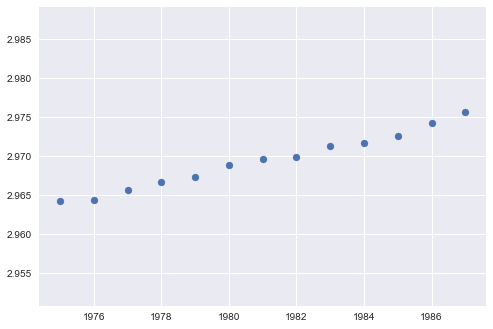

In [2]:
plt.scatter(pisa.year, pisa.lean)
plt.show()

<H3>Statsmodels</H3>
<p><a href="http://www.statsmodels.org/stable/index.html">StatsModels</a> is a module we're using here for some reason...probably because it outputs summary data related to the model being used in the analysis:</p>



In [3]:
import statsmodels.api as sm

y = pisa.lean # target as 1-d array
X = pisa.year # features as 1-d array

X = sm.add_constant(X) # change 1-d array to 2-d array with column of 1's as constant term

# Ordinary Least Squares Fit; instantiate sm.OLS class
linear = sm.OLS(y,X)

# fit model
linearfit = linear.fit()

# use .summary() method to print summary of model
print(linearfit.summary())




                            OLS Regression Results                            
Dep. Variable:                   lean   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     904.1
Date:                Sun, 14 May 2017   Prob (F-statistic):           6.50e-12
Time:                        16:07:08   Log-Likelihood:                 83.777
No. Observations:                  13   AIC:                            -163.6
Df Residuals:                      11   BIC:                            -162.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1233      0.061     18.297      0.0

C:\Users\hshar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<H3>Well that's pretty neat, but what it mean tho?</H3>
<p>Formally, a basic linear regression model is defined as:</p>
<p>$y_i=\beta_0 + \beta_1 x_i + e_i$ where:</p>
<ul>
<li>$e_i ~ N(0,\sigma^2)$ is the error term for each observation $i$ and</li>
<li>$\beta_0$ is the intercept and $\beta_1$ is the slope</li>
<li>the $residual$ for the $ith$ observation is $e_i = \hat{y}_i - y_i$, where $\hat{y}_i$ is the prediction and $y_i$ is the observed value (in almost all situations, the residual is represented as a squared difference i.e. $(\hat{y}_i - y_i)^2$. This is in order to avoid errors in different directions cancelling each other out when summed over. It's possible to represent residuals/error in terms of absolute value and, who knows, maybe even weirder stuff. However, those other approaches are not particularly useful for non-weirdos.) </li>
<li>$N(0,\sigma^2)$ is a normal distribution ($\mu=0$ and a variance of $\sigma^2$)</li>
</ul>
<p>So we got us some assumptions hyear:</p>
<ol>
<li>The errors A.K.A. residuals A.K.A. $e_i$ are normally distributed and</li>
<li>The average error $\bar{e}$ is 0</li>
</ol>
<p>The model we ultimately estimate is $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$</p>

<p>To put it simply, $\hat{y}_i$ is a prediction for some observation, which, unless we're trying to guess something like how many minutes have passed based on how many seconds have passed, will not be perfectly accurate. The residual is just how wrong that guess is. Error is the global off-ness of our guesses</p>

In [4]:
# Let's have us a look at them residuals:

# Predict using X and the fitted model
yhat = linearfit.predict(X)

# subtract y from yhat to get residuals
residuals = yhat - y

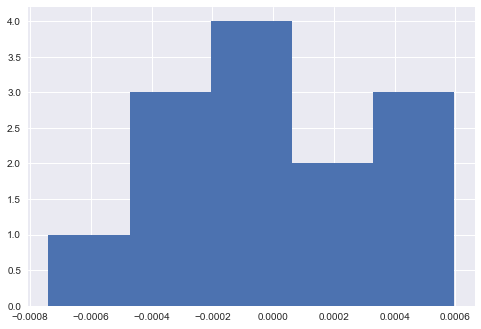

In [33]:
# Let's see how the residuals are distributed

plt.hist(residuals, bins=5)

plt.show()

<H3>Evaluating the linear model: Some Sums of Squares</H3>
<H4>Sum of Square Error (SSE)</H4>
<p>$SSE = \sum_{i=1}^n (y_i - \hat{y_i})^2 = \sum_{i=1}^n e_i^2$</p>
<p>SSE gives the sum of all residuals, thus providing a measure of the overall distance between the predicted and observed values</p>
<H4>Regression Sum of Squares (RSS)</H4>
<p>$RSS = \sum_{i=1}^n (\bar{y} - \hat{y_i})^2 \text{ where }\bar{y} = \dfrac{1}{n}\sum_{i=1}^n y_i$</p>
<p>RSS measures the difference of each prediction relative to the sample mean ($\bar{y}$). The smaller the RSS, the more the predictions resemble the mean of the observed values, which is usually a sign that the model is not very good. The sweet spot is where SSE is relatively low and RSS is relatively high, which indicates that the difference between predicted and observed values is low, but the difference between predicted values and the mean is high.</p>
<H4>Total Sum of Squares</H4>
<p>$TSS = \sum_{i=1}^n (y_i - \bar{y})^2$</p>
<p>This is basically variance.....</p>

<p>So:</p>
<ul>
<li>SSE is the total difference between observed and predicted values</li>
<li>RSS is the difference between each prediction and the mean</li>
<li>TSS is the difference between each value and the mean</li>
</ul>
<p>This means that it can be shown that: $TSS=RSS+SSE$</p>


In [6]:
import numpy as np

# Calculate SSE
SSE = np.sum((y.values-yhat)**2)

# Calculate TSS
TSS = np.sum((y.values-np.mean(y.values))**2)

# Calculate RSS
RSS = np.sum((np.mean(y.values)-yhat)**2)

print("SSE: {}," "TSS: {}," "RSS: {}".format(SSE, TSS, RSS))

SSE: 1.9228571428566404e-06,TSS: 0.00015996769230769499,RSS: 0.00015804483516481858


<H3>R-Squared: Dat Coefficient of Determination</H3>
<p>$R^2$ is a saucy little measure of <a href="https://en.wikipedia.org/wiki/Linear_independence">linear dependance</a> which essentially tells us how well some vector represents a combination of the other vectors within a set of vectors. That is to say, how well does the set of numbers we produced with our model work as a combination of our observation vectors</p>
<p>$R^2 = 1 - \dfrac{SSE}{TSS} = \dfrac{RSS}{TSS}$</p>

In [7]:
# Compute R-squared
R2 = RSS/TSS
print("R-squared: {}".format(R2))

R-squared: 0.9879797156842282


<p>Neat....so that means that almost 99% of the variance observed is accounted for by the regression model, which makes sense if you look at the plot of the data points above. This is linear as all get out</p>

<h4>Now let's look at some coefficients:</h4>


In [8]:
# print model summary
print(linearfit.summary())

# print model parameters
print(linearfit.params)




                            OLS Regression Results                            
Dep. Variable:                   lean   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     904.1
Date:                Sun, 14 May 2017   Prob (F-statistic):           6.50e-12
Time:                        16:07:08   Log-Likelihood:                 83.777
No. Observations:                  13   AIC:                            -163.6
Df Residuals:                      11   BIC:                            -162.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1233      0.061     18.297      0.0

C:\Users\hshar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [10]:
# So the constant is ~1.12 (this is the "b" in y=mx+b)

# the "m" is .000932

# let's predict how much lean we're gonna see over 15 years

delta = (0.000932*15)

print(delta)

cooler_way_of_doing_it = linearfit.params['year']*15

print(cooler_way_of_doing_it)

0.01398
0.013978021978


<h3>Variance of Coefficients</h3>
<p>The Variance of Coefficients is the estimated variance for a single varable used as a coefficient in the linear model</p>
<p>For a single variable $\hat{\beta}_1$, the variance is defined as:</p>
<p>$s^2(\hat{\beta_1}) = \dfrac{\sum_{i=1}^n (y_i - \hat{y_i})^2}{(n-2) \sum_{i=1}^n (x_i - \bar{x})^2} = \dfrac{SSE}{(n-2) \sum_{i=1}^n (x_i - \bar{x})^2}$</p>
<p>The numerator, $SSE$, represents the error within the model as a whole. The denominator, measures the amount of variance within the independent variable, $x$:</p><p> $\sum_{i=1}^n (x_i - \bar{x})^2$, and is nomalized over the $SSE$ terms by multiplying by $(n-2)$, since we have 2 degrees of freedom </p>

In [12]:
#Calculating variance of coefficient "Year" 
# get the mean
x_bar = np.mean(pisa.year)

# sum over x values - x_bar squared and divide SSE by the value:
s2b1 = SSE / ((pisa.shape[0]-2) * (np.sum((pisa.year - x_bar)**2)))

print("Variance of year: {}".format(s2b1))

Variance of year: 9.604681033249953e-10


<H3>The T-Distribution</H3>
<p>Now that we have a linear model, we can show that the dependent variable (dat lean) is dependent on the independent variable (year)</p>
<p>We use Student's t-test for this, which relies on the <a href="https://en.wikipedia.org/wiki/Student%27s_t-distribution"> t-distribution</a>, which is useful when the sample size is small and the population standard deviation is unknown.</p>
<p>If we take a sample of n observations from a normal distribution, the t-distribution with $v=n-1$ degrees of freedom can be defined as the distribution of the location of the sample mean relative to the true mean divided by the standard deviation, after multiplying by the standardizing term $\sqrt{n}$</p>
<p>It's worth emphasizing that the main difference between the normal distribution and the t-distribution is that the normal distribution assumes that we are looking at the entire population, whereas the t-distribution accounts for the limited sample size by increasing the variance relative to the number of observations</p>

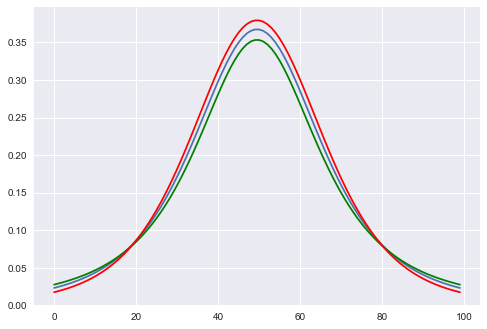

In [21]:
from scipy.stats import t

# generate 100 values between -3 and 3
x = np.linspace(-3,3, 100)

# compute the pdf with 3 degrees of freedom:
three_dof_pdf = t.pdf(x=x, df=3)
two_dof_pdf = t.pdf(x=x, df=2)
five_dof_pdf = t.pdf(x=x, df=5)

plt.plot(three_dof_pdf)
plt.plot(two_dof_pdf, c='g')
plt.plot(five_dof_pdf, c= 'r')
plt.show()

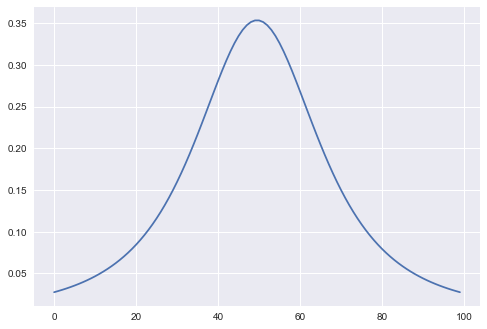

In [25]:
# Plot for our data
pisa_pdf = t.pdf(x=x, df=2)
plt.plot(pisa_pdf)
plt.show()


<h3>Statistical Significance of Coefficients</h3>
<p>Now that we have a t-distribution probability density function, we can do some significance testing</p>
<p>Step one: State dat hypothesis:</p>
<p>$H_0:\:\beta_1 = 0\:\:H_1:\:\beta_1\neq 0$</p>
<p>Step two: Test dat null hypothesis ($H_0$)</p>
<p>Using the t-statistic, $t = \dfrac{\left|\hat{\beta_1} - 0\right|} {\sqrt{s^2(\hat{\beta_1})}}$,<br>where the numerator is the absolute value of the coefficient ($\hat{\beta}_1$) and the denominator is the standard deviation of the variance of that coefficient: $\sqrt{s^2(\hat{\beta}_1)}$</p>
<p>This tells us how many standard deviations the expected coefficient is from zero. Looking at the pdf above, we can see that the a high t-statistic will be less likely the further away from zero you get</p>

In [34]:
# Let's find that t-statistic

tstat = (np.absolute(linearfit.params["year"]-0)/(s2b1**.5))

print(tstat)

30.0685846877


<H3>Testing the coefficient</H3>
<p>Now that we have the t-statistic, we can test our coefficient</p>
<p>To do this we need to find the probability that $\beta_1$ is different from 0 at some significance level (P-values). Like all dem scientists, let's just use .05, meaning that we want to be 95% certain that $\beta_1$ differs from 0</p>
<p>Using the probability density function of the t-distribution, we can determine the probability of our result given our p-value and degrees of freedom</p>
<p>So, if $\beta_1$ is our coefficient for our values of x, we're determining whether it improves up on just drawing a line through the data at the intercept with a slope of 0</p> 

<H3>READ UP MORE ON THIS SHIT</H3>
<ul>
<li><a href="https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)">Degrees of Freedom</a></li>
<li><a href="http://www.statisticshowto.com/probability-and-statistics/regression-analysis/">Regression Analysis</a></li>
<li><a href="https://en.wikipedia.org/wiki/Student%27s_t-test">Student's T-test</a></li>
</ul>

In [36]:
# At the 95% confidence interval for a two-sided t-test we must use a p-value of 0.975
pval = 0.975

# The degrees of freedom
df = pisa.shape[0] - 2

# The probability to test against
p = t.cdf(tstat, df=df)

beta1_test = True
print(p)

0.999999999997
